In [1]:
import keras

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization
from keras.datasets import mnist
from keras.optimizers import SGD

Using TensorFlow backend.


In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X Shape:  (60000, 28, 28)
Y[0] value: 5

X[0] value as image:


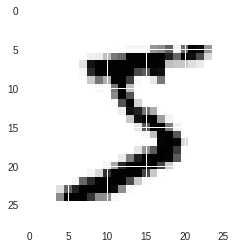

In [14]:
print ('X Shape: ', X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
print ('Y[0] value:', y_train[0])
print ('\nX[0] value as image:')

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [22]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [97]:
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32, 3, 3, input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Convolution2D(10, 3, 3, activation='relu'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Convolution2D(10, 3, 3, activation='relu'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  app.launch_new_instance()


In [98]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_167 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
activation_126 (Activation)  (None, 26, 26, 32)        0         
_________________________________________________________________
batch_normalization_64 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_168 (Conv2D)          (None, 11, 11, 32)        9248      
_________________________________________________________________
activation_127 (Activation)  (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization_65 (Batc (None, 11, 11, 32)        128       
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [100]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 179s 3ms/step - loss: 0.2351 - acc: 0.9274
Epoch 2/10
60000/60000 [==============================] - 178s 3ms/step - loss: 0.0720 - acc: 0.9776
Epoch 3/10
60000/60000 [==============================] - 177s 3ms/step - loss: 0.0577 - acc: 0.9815
Epoch 4/10
60000/60000 [==============================] - 178s 3ms/step - loss: 0.0493 - acc: 0.9850
Epoch 5/10
60000/60000 [==============================] - 180s 3ms/step - loss: 0.0436 - acc: 0.9863
Epoch 6/10
60000/60000 [==============================] - 180s 3ms/step - loss: 0.0412 - acc: 0.9867
Epoch 7/10
60000/60000 [==============================] - 179s 3ms/step - loss: 0.0378 - acc: 0.9879
Epoch 8/10
60000/60000 [==============================] - 175s 3ms/step - loss: 0.0348 - acc: 0.9890
Epoch 9/10
60000/60000 [==============================] - 176s 3ms/step - loss: 0.0319 - acc: 0.9900
Epoch 10/10
60000/60000 [==============================] - 176s 3ms/step - loss: 0.0295 - a

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [102]:
print(score)

[0.02657942500860954, 0.9921]
